# 911 Calls Capstone Project

## Assignment_5

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\911.csv")

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 17:40,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
## value_counts() gives the count of unique 'zip' values and head(5) gives top 5 zipcodes

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
## Here df['title'].nunique() helps us getting the number of unique values in the coulmn 'tile' of dataframe named df.

df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
## apply() function calls the lambda function and applies it to every row of the column 'title' in the dataframe df.
## lambda function here is used to split the title in two parts distinguished by ':' and the [0] is the index operator which 
## returns the first part of the name in title.

df['Reason'] = df['title'].apply(lambda s:s.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
## It gives the count for call reason

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

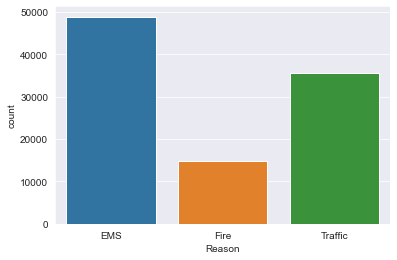

In [11]:
## Countplot helps visualising the resons of call. 'EMS' was the maximum reason for calling followed by 'Traffic' and 'Fire'
## being least.

sns.countplot(data=df,x='Reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
## Here finding the output with and without use of iloc can be seen as below. I feel the cange in output is because we 
## are finding the type of column which gives series and finding the type of a row in the column gives string.

print(type(df['timeStamp']))
print(type(df['timeStamp'].iloc[0]))

<class 'pandas.core.series.Series'>
<class 'str'>


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [14]:
## We are creating new columns for the table using lambda function.

df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df['Day of Week']

0        0
1        0
2        0
3        0
4        0
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
## Dictionary is used in lambda function to use the day names instead of day codes.

df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])
df['Day of Week'].head()

0    Mon
1    Mon
2    Mon
3    Mon
4    Mon
Name: Day of Week, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

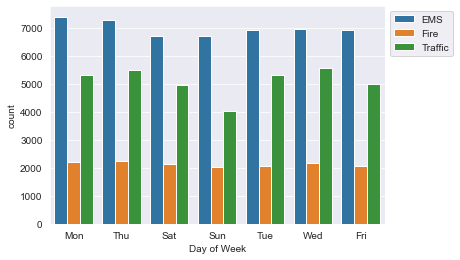

In [17]:
## Countplot is used to visualise the counts of reason day wise. Setting hue='Reason' allows us to compare the count according
## to reason.

## bbox_to_anchor specifies the location of legend box. The arguments (1, 1) means the box to be located at the upper right 
## corner of the axes coordinate.

sns.countplot(data=df, x='Day of Week',hue='Reason')
plt.legend(bbox_to_anchor=(1, 1))

**Now do the same for Month:**

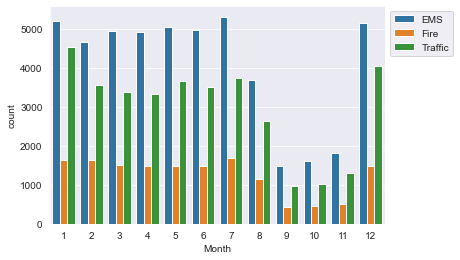

In [18]:
sns.countplot(data=df,x='Month',hue='Reason')
plt.legend(bbox_to_anchor=(1, 1))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [19]:
## First grouping the data Month-wise and finding the count.

mon_df=df.groupby('Month').count()
mon_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355
2,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881
3,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865
4,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725
5,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

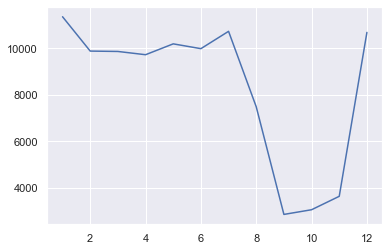

In [20]:
sns.set()
plt.plot(mon_df['lat'])

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [21]:
## Setting Month as index 

mon_df['Month'] = mon_df.index
mon_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,,
1,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355,1
2,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881,2
3,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865,3
4,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725,4
5,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191,5


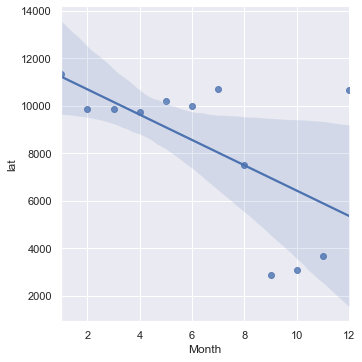

In [22]:
## To visualise the no. of calls per month lm plot is used. From graph Linear relationship is not best fit here.

sns.lmplot(x='Month',y='lat',data=mon_df)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [23]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

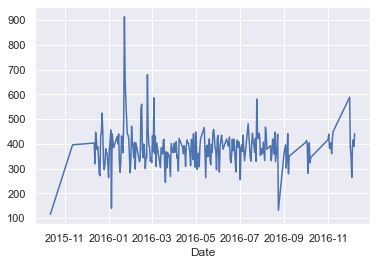

In [24]:
df.groupby(by='Date').count()['lat'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

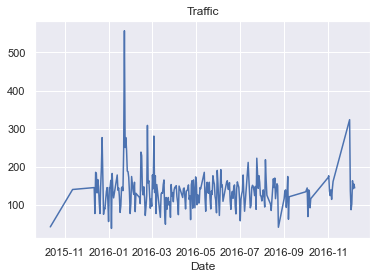

In [25]:
df[df['Reason']=='Traffic'].groupby(by='Date').count()['Reason'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

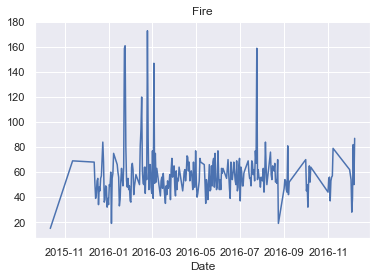

In [26]:
df[df['Reason']=='Fire'].groupby(by='Date').count()['Reason'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

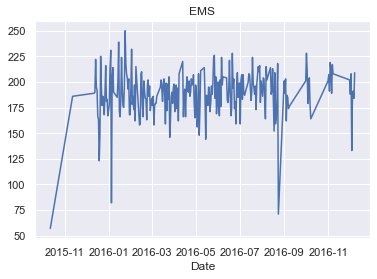

In [27]:
df[df['Reason']=='EMS'].groupby(by='Date').count()['Reason'].plot()
plt.title('EMS')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [28]:
data = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
data = data.loc[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,279,228,215,191,205,265,377,637,766,793,...,859,952,1014,1031,898,818,670,536,492,328
Tue,283,247,189,188,218,237,367,604,769,807,...,910,885,973,927,819,680,534,463,421,293
Wed,263,233,206,218,165,246,390,605,886,872,...,869,900,967,986,874,674,684,577,486,353
Thu,296,231,233,183,188,204,360,564,771,795,...,893,975,954,985,848,737,716,648,470,411
Fri,283,220,211,184,214,207,379,551,751,699,...,880,862,944,947,785,659,593,489,477,419
Sat,355,266,221,244,229,249,305,482,584,683,...,812,824,874,875,823,712,619,551,492,396
Sun,353,296,274,227,199,221,335,527,517,665,...,774,756,764,766,715,628,561,524,445,359


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

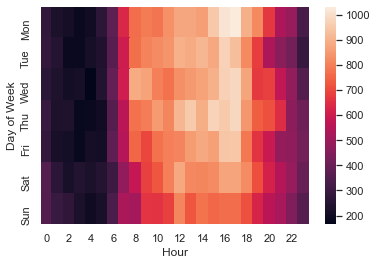

In [29]:
## From this heat map we can say that the no. of calls were maximum at 17th hour on monday. Also the number of calls are minimum
## at 0 to 6 hrs and at 22 and 23 hrs of each day.

sns.heatmap(data)


** Now create a clustermap using this DataFrame. **

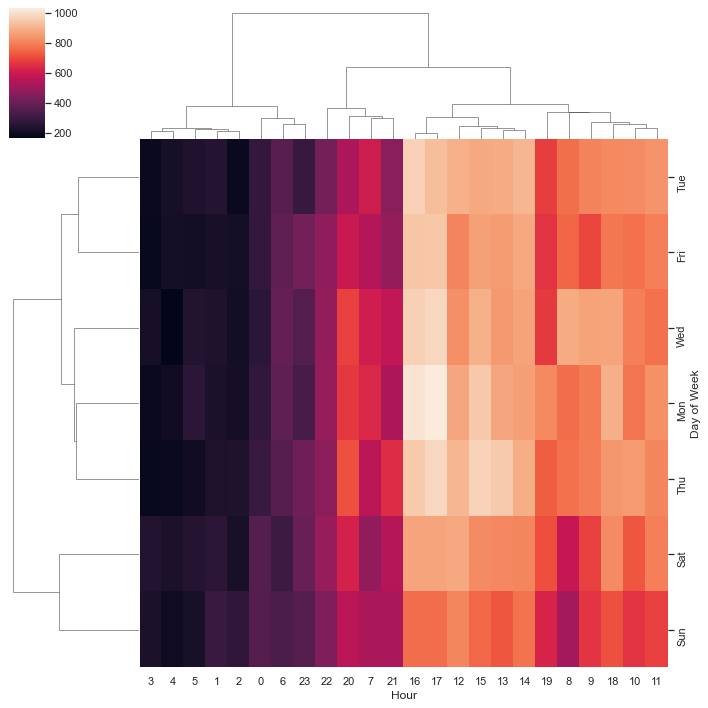

In [30]:
sns.clustermap(data)

In [31]:
## Sunday and Saturday forms 1 cluster and the rest days forms another cluster.

## Hours 3,4,5,1,2,0,6,23 forms 1 cluster, while 22, 20,7,21 forms another cluster and the remaining i.e,
## 16,17,12,15,13,14,19,8,10,11 can be considered forming other homogeneous group.

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [32]:
data_mon = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
data_mon = data_mon.loc[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
data_mon

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Mon,1364,1966,1463,1217,1481,1617,1381,1486,357,521,417,1650
Tue,1077,1373,1797,1174,1476,1650,1258,1221,441,281,866,1650
Wed,1707,1458,1525,1482,1126,1962,1743,954,279,378,439,1651
Thu,1610,1177,1494,1495,1197,1568,1646,729,715,404,780,2180
Fri,1995,1138,1359,1956,1622,1100,1907,779,380,323,381,1053
Sat,1965,1497,980,1412,1467,1063,1373,1188,396,751,404,1328
Sun,1637,1272,1247,989,1822,1025,1421,1133,302,413,360,1171


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

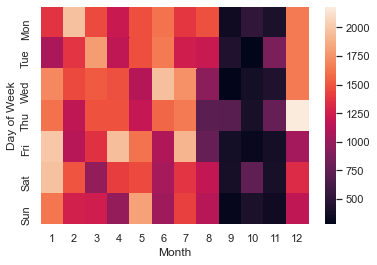

In [33]:
## From this heat map it can be concluded that maximum number of calls were made in month of december that too on Thursday.
## Minimum calls were made in the 9,10,11th month.

sns.heatmap(data_mon)

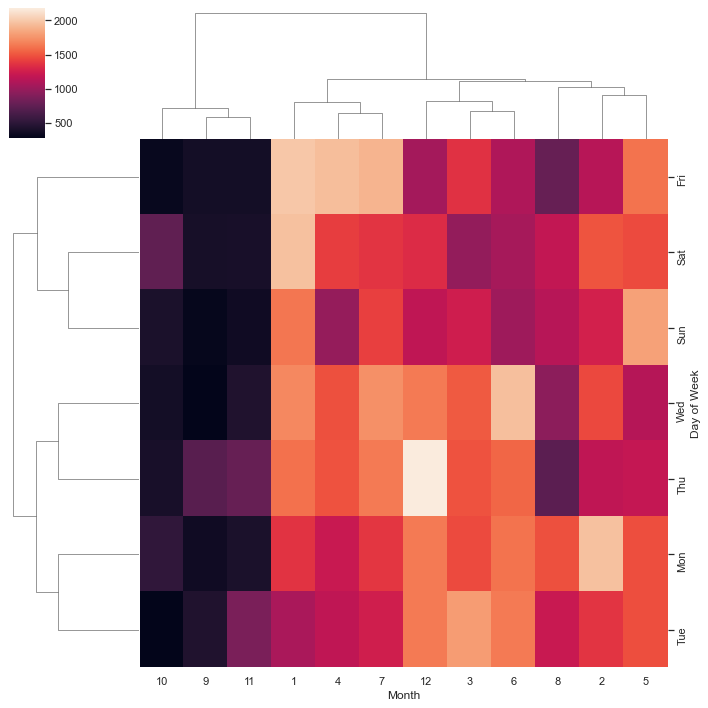

In [34]:
sns.clustermap(data_mon)

In [35]:
## Here 10,9,11 th month forms a group and all other months constitutes other group.

## Tueasday, Monday, Thursday, Wednesday forms one cluster while other days form another cluster. 

**Continue exploring the Data however you see fit!**
# Great Job!